## Machine Learning- Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/golna/OneDrive/Desktop/Personal Projects/House_Rent_Dataset.csv")
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
cdf = df[['Rent', 'City', 'Area Type', 'Furnishing Status', 'Size']]
cdf.head(10)

,Rent,City,Area Type,Furnishing Status,Size
0,10000,Kolkata,Super Area,Unfurnished,1100
1,20000,Kolkata,Super Area,Semi-Furnished,800
2,17000,Kolkata,Super Area,Semi-Furnished,1000
3,10000,Kolkata,Super Area,Unfurnished,800
4,7500,Kolkata,Carpet Area,Unfurnished,850
5,7000,Kolkata,Super Area,Unfurnished,600
6,10000,Kolkata,Super Area,Unfurnished,700
7,5000,Kolkata,Super Area,Unfurnished,250
8,26000,Kolkata,Carpet Area,Unfurnished,800
9,10000,Kolkata,Carpet Area,Semi-Furnished,1000


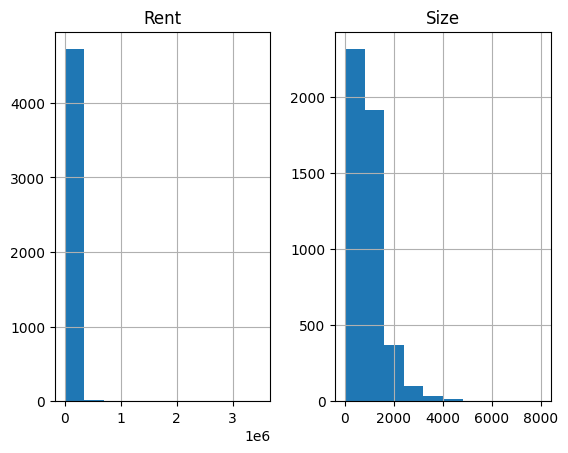

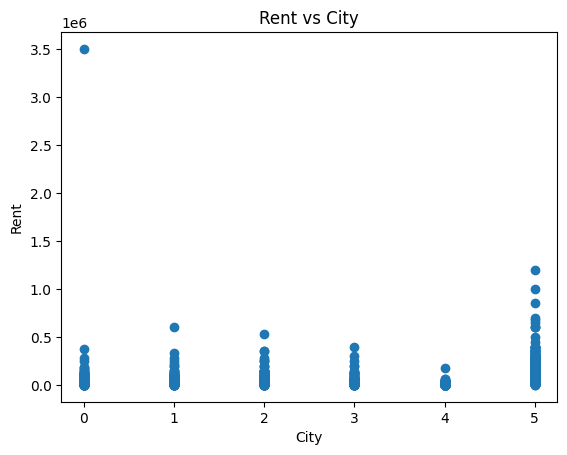

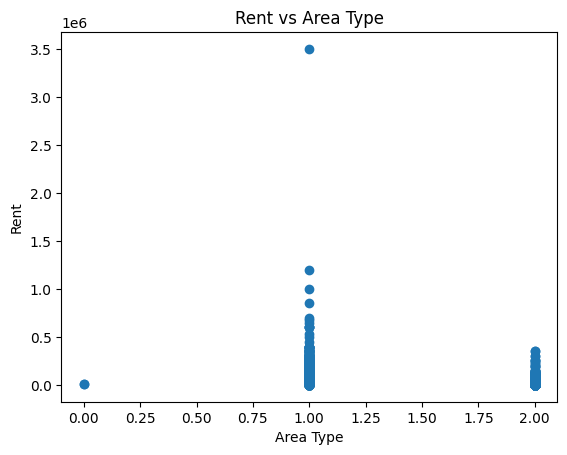

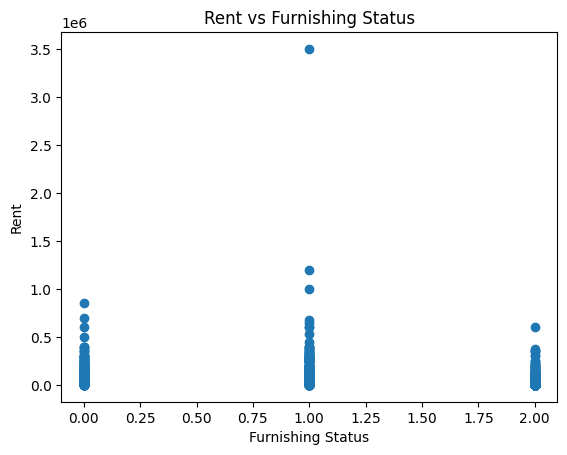

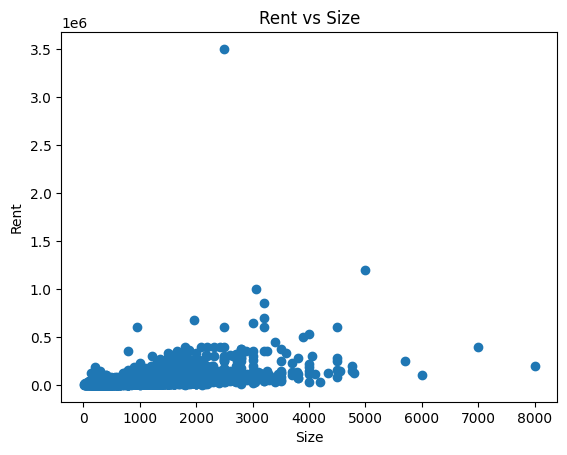

In [6]:
viz = cdf[['Rent', 'City', 'Area Type', 'Furnishing Status', 'Size']]
viz.hist()

plt.show() 
for i in viz:
    if i != 'Rent':  # Skip 'Rent' as we are plotting against it
        if viz[i].dtype in ['int64', 'float64']:  # Check if the column is numeric
            plt.scatter(viz[i], viz['Rent'], label=i)
        else:
            plt.scatter(viz[i].astype('category').cat.codes, viz['Rent'], label=i)  # Encode categorical data
        plt.xlabel(i)
        plt.ylabel('Rent')
        plt.title(f'Rent vs {i}')
        plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

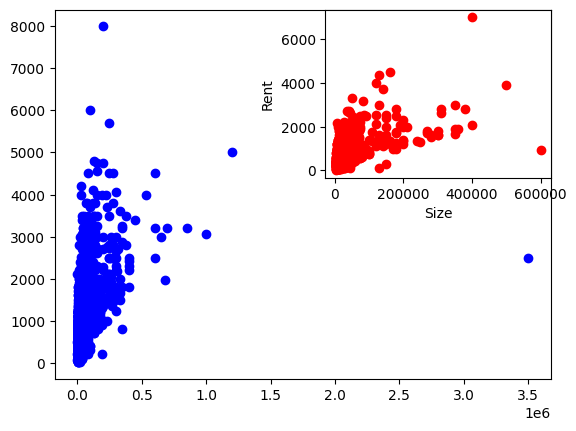

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(222)
ax1.scatter(train.Rent, train.Size, label="Train data", color="blue")
ax2.scatter(test.Rent, test.Size, label="Test data", color="red")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.show()

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Size']])
train_y = np.asanyarray(train[['Rent']])
reg.fit(train_x, train_y)
print('Coefficients: ', reg.coef_)
print('Intercent: ', reg.intercept_)

Coefficients:  [[52.13079119]]
Intercent:  [-15456.69629495]


In [15]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Size']])
test_y = np.asanyarray(test[['Rent']])
test_y_ = reg.predict(test_x)
print("Mean absolute error: %2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2 square: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 28936.160013
Residual sum of squares (MSE): 2449942157.95
R2 square: 0.24


## Size is only predicting 24% of total rent changes. The model's prediction could be increased by including more variables (Multiple regression)